In [1]:
import sys, os, array, time
import numpy as np
import matplotlib.pyplot as plt
import IPython

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dropout,Dense
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.gen_array_ops import mirror_pad_eager_fallback
from PIL import Image
import PIL.ImageOps  
import cv2
from sklearn.utils import shuffle

from keras.preprocessing.image import ImageDataGenerator

2022-10-05 13:55:11.121233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
r=tf.keras.models.load_model("model.h5")

In [33]:
x_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")




test_loss, test_acc = r.evaluate(x_test,y_test, verbose=2)

33/33 - 1s - loss: 0.2151 - accuracy: 0.9479 - 1s/epoch - 32ms/step


1/1 [==============================] - 0s 25ms/step
50%


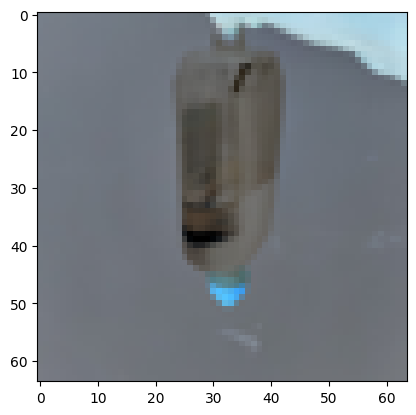

In [31]:
test=x_test[3]
plt.imshow(test)
prediction=r.predict(test.reshape(-1,64,64,3))
list_input=['100%','50%','80%','empty']
b=np.argmax(prediction)
print(list_input[b])

In [24]:
from PIL import Image as pil_image

test=x_test[1].shape
img=pil_image.open("test.jpeg")
np_im = np.array(img)/255
np_im=test.reshape(-1,64,64,3)
list_input=['100%','50%','80%','empty']


AttributeError: 'tuple' object has no attribute 'reshape'

In [18]:
b=np.argmax(prediction)
print(list_input[b])

50%


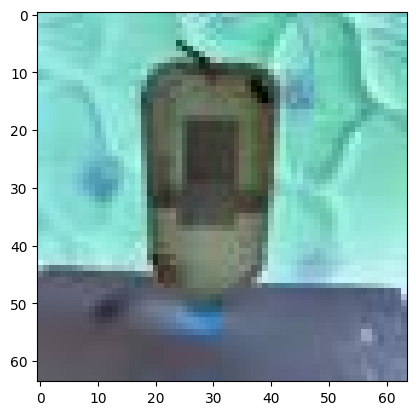

In [20]:
plt.imshow(np_im.reshape(64,64,3))


(64, 64, 3)

In [45]:
Y=np.load("y_test.npy")
Y2=tf.keras.utils.to_categorical(Y, 4)
with open('y_test2.npy', 'wb') as f:
   np.save(f,Y2)

In [47]:
Y2[1:5]

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [38]:
Y[1:5]


array([0, 1, 1, 3])